In [1]:
# Fill in your name using the format below and student ID number
your_name = "Verburgh, Luuc"
student_id = "0962068"

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
# Before submission, set this to True so that you can render and verify this notebook without training deep learning models.
# Any deep learning models will be trained from file instead.
stop_training = True

In [4]:
# Uncomment the following line to run in Google Colab
#!pip install --quiet openml 

In [20]:
# Uncomment the following line to run in Google Colab
#%tensorflow_version 2.x
import tensorflow as tf
#tf.config.experimental.list_physical_devices('GPU') # Check whether GPUs are available

In [6]:
%matplotlib inline
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [7]:
from packaging import version
import sklearn
import tensorflow
sklearn_version = sklearn.__version__
tensorflow_version = tensorflow.__version__
if version.parse(sklearn_version) < version.parse("0.22.0"):
    print("scikit-learn is outdated. Please update now!")
if version.parse(tensorflow_version) < version.parse("2.1.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.1.".format(tensorflow_version))
else:
    print("Hi{}, Looks good. You may continue :)".format(your_name.split(",")[1]))

Hi Luuc, Looks good. You may continue :)


# Assignment 3

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Storing and submitting files
You must be able to store your models and submit them to GitHub Classroom. The evaluation functions used in this notebook will automatically store models for you.

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
* Fill in the path to your assignment folder below
  * It's likely '/content/drive/My Drive/assignment-3-yourname'

In [16]:
# base_dir = '/content/drive/My Drive/assignment-3-luucv' # For Google Colab
base_dir = ''

In [0]:
#Uncomment to link Colab notebook to Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed things up training quite a bit. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 3rd cell on the top of this notebook to check that the GPU is found.

Note that Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine.

### Constraints
* Your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are.
* When questions ask you to provide an explanation, it should be less than 500
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters" yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your model performs. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to run the verification script and check that all the results are included.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model.
* Be original. We will check for plagiarism between student submissions.

### Data
The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. Your goal is to build models that recognize the correct digit.

If you use Colab, uncomment the following to cache the dataset inside the VM. This will make reloading faster if you need to restart your notebook. After longer periods of inactivity, your VM may be recycled and the cache lost, in which case the dataset will be downloaded again. Also note that this dataset is about 1Gb large, and will take even more space in memory. You may need to switch to a high-RAM environment (Colab will ask you if you hit the limit).

In [0]:
# Use OpenML caching in Colab
# On your local machine, it will store data in a hidden folder '~/.openml'
#import os
#oml.config.cache_directory = os.path.expanduser('/content/cache')

In [0]:
# Download Streetview data. Takes a while (several minutes), and quite a bit of
# memory when it needs to download. After caching it loads faster.
SVHN = oml.datasets.get_dataset(41081)
X, y, _, _ = SVHN.get_data(dataset_format='array',
    target=SVHN.default_target_attribute)

Reshape, sample and split the data

In [0]:
from tensorflow.keras.utils import to_categorical

Xr = X.reshape((len(X),32,32,3))
Xr = Xr / 255.
yr = to_categorical(y)

In [0]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split
# We do an 80-20 split for the training and test set, and then again a 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(Xr,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)
evaluation_split = X_train, X_val, y_train, y_val

Check the formatting - and what the data looks like

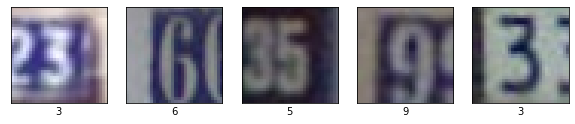

In [0]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap='gray')
        else:
            axes[n].imshow(X[n])
        axes[n].set_xlabel((np.argmax(y[n])+1)%10) # Label is index+1
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,len(X_train)) for i in range(5)]
X_random = [X_train[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random)

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [19]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model # for use with tensorflow

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')

def load_model_from_file(base_dir, name, extension='.h5'):
    """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
    function following the Keras API. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    try:
        model = load_model(os.path.join(base_dir, name+extension))
    except OSError:
        shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
        return False
    return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
    """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    model.save(os.path.join(base_dir, name+extension))

# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# DO NOT EDIT
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Training the model", verbose)
        if generator:
            generator, X_val, y_val = data
            history = model.fit(generator, epochs=epochs, batch_size=batch_size,
                              steps_per_epoch=steps_per_epoch, verbose=1, 
                              validation_data=(X_val, y_val))
            learning_curves = history.history
        else:
            X_train, X_val, y_train, y_val = data
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                              verbose=1, validation_data=(X_val, y_val))
            learning_curves = history.history
        shout("Saving to file", verbose)
        save_model_to_file(model, base_dir, name)
        with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
            pickle.dump(learning_curves, file_pi)
        shout("Model stored in "+base_dir, verbose)
    else: # Load from file
        shout("Loading model from file", verbose)
        model = load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
        shout("Success!", verbose)
    # Report
    print(model.summary())
    lc = pd.DataFrame(learning_curves)
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    print(lc.apply(minMax))

Training the model
Epoch 1/3
1986/1986 [==============================] - 7s 4ms/step - loss: 2.2449 - accuracy: 0.1903 - val_loss: 2.2331 - val_accuracy: 0.1910
Epoch 2/3
1986/1986 [==============================] - 7s 3ms/step - loss: 2.2337 - accuracy: 0.1910 - val_loss: 2.2331 - val_accuracy: 0.1910
Epoch 3/3
1986/1986 [==============================] - 7s 3ms/step - loss: 2.2335 - accuracy: 0.1910 - val_loss: 2.2331 - val_accuracy: 0.1910
Saving to file
Model stored in /content/drive/My Drive/assignment-3-luucv
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                30730     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110    

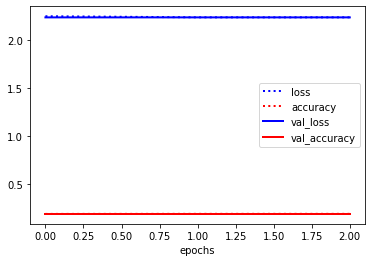

In [0]:
# Toy usage example
# Remove before submission
from tensorflow.keras import models
from tensorflow.keras import layers 

def build_toy_model():
    model = models.Sequential()
    model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# First build and store
run_evaluation("toy_example", build_toy_model, evaluation_split, base_dir, 
               train=True, epochs=3, batch_size=32)

Loading model from file
Success!
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                30730     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 30,840
Trainable params: 30,840
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  2.233544  0.190293  2.233050      0.190974
max  2.244919  0.190954  2.233074      0.190974


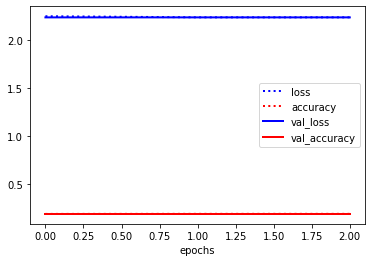

In [0]:
# Toy usage example
# Remove before submission
# With train=False: load from file and report the same results without rerunning
run_evaluation("toy_example", build_toy_model, evaluation_split, base_dir, 
               train=False)

## Part 1. Dense networks (10 points)

### Question 1.1: Baseline model (4 points)
- Build a dense network (with only dense layers) of at least 3 layers that is shaped like a pyramid: The first layer must have many nodes, and every subsequent layer must have increasingly fewer nodes, e.g. half as many. Implement a function 'build_model_1_1' that returns this model.
- You can explore different settings, but don't use any preprocessing or regularization yet. You should be able to achieve at least 70% accuracy, but more is of course better. Unless otherwise stated, you can use accuracy as the evaluation metric in all questions.
* Add a small description of your design choices (max. 500 characters) in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function. For this question, you should not use more than 50 epochs.

Training the model
Epoch 1/50
1986/1986 [==============================] - 7s 4ms/step - loss: 0.2808 - accuracy: 0.3484 - val_loss: 0.2217 - val_accuracy: 0.5260
Epoch 2/50
1986/1986 [==============================] - 8s 4ms/step - loss: 0.1957 - accuracy: 0.5978 - val_loss: 0.1948 - val_accuracy: 0.6075
Epoch 3/50
1986/1986 [==============================] - 8s 4ms/step - loss: 0.1729 - accuracy: 0.6599 - val_loss: 0.1690 - val_accuracy: 0.6668
Epoch 4/50
1986/1986 [==============================] - 7s 4ms/step - loss: 0.1611 - accuracy: 0.6864 - val_loss: 0.1663 - val_accuracy: 0.6736
Epoch 5/50
1986/1986 [==============================] - 7s 4ms/step - loss: 0.1532 - accuracy: 0.7059 - val_loss: 0.1542 - val_accuracy: 0.7043
Epoch 6/50
1986/1986 [==============================] - 7s 4ms/step - loss: 0.1477 - accuracy: 0.7185 - val_loss: 0.1512 - val_accuracy: 0.7078
Epoch 7/50
1986/1986 [==============================] - 7s 4ms/step - loss: 0.1435 - accuracy: 0.7283 - val_loss: 0.1

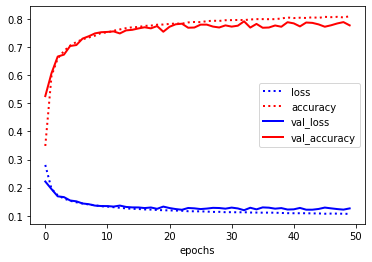

In [0]:
def build_model_1_1():
  model = models.Sequential()
  model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
  model.add(layers.Dense(1500, activation='relu'))
  model.add(layers.Dense(250, activation='relu'))
  model.add(layers.Dense(10, activation='sigmoid'))

  model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model

run_evaluation("model_1_1", build_model_1_1, evaluation_split, base_dir, 
               train=True, epochs=50, batch_size=32)
answer_q_1_1 = """
               The first layer reshapes the input to a single array in order to
               use the Dense layers. The first Dense layer has 1500 units to not 
               lose too much data after the reshape with a relu activation 
               function to overcome the vanishing gradient. The second Dense layer 
               is almost at 1/10 of the previous one, this was chosen to not make 
               the model too big and 3072 to 250 seemed like a good gap. The 
               last Dense layer outputs a 10 element array with the classification. 
               """
print("Answer is {} characters long".format(len(answer_q_1_1)))

### Question 1.2: Preprocessing (2 points)
Rerun the model, but now preprocess the data first by converting the images to 
greyscale. You can use the helper function below. If you want to do additional 
preprocessing, you can do that here, too.
* Store the preprocessed data as a tuple `preprocessed_split`
* Rerun and re-evaluate your model using the preprocessed data.
  * For the remainder of the assignment, always use the preprocessed data
* Explain what you did and interpret the results in 'answer_q_1_2'. Is the model
  better, if so, why?

In [0]:
# Luminance-preserving RGB to greyscale conversion
def rgb2gray(X):
    return np.expand_dims(np.dot(X, [0.2990, 0.5870, 0.1140]), axis=3)

Training the model
Epoch 1/50
1986/1986 [==============================] - 7s 3ms/step - loss: 0.2722 - accuracy: 0.3632 - val_loss: 0.2192 - val_accuracy: 0.5313
Epoch 2/50
1986/1986 [==============================] - 7s 3ms/step - loss: 0.1894 - accuracy: 0.6153 - val_loss: 0.1767 - val_accuracy: 0.6466
Epoch 3/50
1986/1986 [==============================] - 7s 3ms/step - loss: 0.1677 - accuracy: 0.6714 - val_loss: 0.1635 - val_accuracy: 0.6781
Epoch 4/50
1986/1986 [==============================] - 7s 3ms/step - loss: 0.1559 - accuracy: 0.6990 - val_loss: 0.1545 - val_accuracy: 0.7052
Epoch 5/50
1986/1986 [==============================] - 7s 3ms/step - loss: 0.1479 - accuracy: 0.7178 - val_loss: 0.1515 - val_accuracy: 0.7077
Epoch 6/50
1986/1986 [==============================] - 7s 3ms/step - loss: 0.1419 - accuracy: 0.7305 - val_loss: 0.1402 - val_accuracy: 0.7396
Epoch 7/50
1986/1986 [==============================] - 7s 3ms/step - loss: 0.1366 - accuracy: 0.7428 - val_loss: 0.1

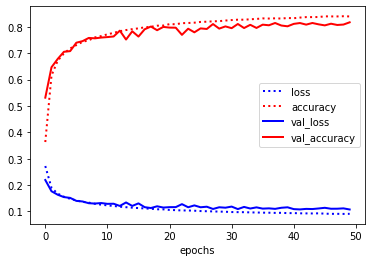

In [0]:
# Replace with the preprocessed data
preprocessed_split = rgb2gray(X_train), rgb2gray(X_val), y_train, y_val

# Adjusted model
def build_model_1_2():
  model = models.Sequential()
  # model.add(layers.Flatten())
  model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
  model.add(layers.Dense(1024, activation='relu'))
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(10, activation='sigmoid'))

  model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model

# Evaluate. Use a new name 'model_1_2' to not overwrite the previous trained model
run_evaluation("model_1_2", build_model_1_2, preprocessed_split, base_dir, 
               train=True, epochs=50, batch_size=32)
answer_q_1_2 = """
               The gap between the accuracy and validation accuray greatly shrincks,
               meaning that the overfitting is less with preprocessing. The max
               validation accuracy was 0.792 without any preprocessing while now
               it is 0.817.
               """
print("Answer is {} characters long".format(len(answer_q_1_2)))

### Question 1.3: Regularization and tuning (4 points)
* Regularize the model. You can explore (and combine) different techniques. What works best?
* Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
* Explain your findings and final design decisions. Retrain the model again on the preprocessed data and discuss the results.
* Return your model in function 'build_model_1_3' and write your answer in 'answer_q_1_3'

Training the model
Epoch 1/50
1986/1986 [==============================] - 7s 4ms/step - loss: 0.2837 - accuracy: 0.3703 - val_loss: 0.2270 - val_accuracy: 0.5245
Epoch 2/50
1986/1986 [==============================] - 7s 4ms/step - loss: 0.1996 - accuracy: 0.6159 - val_loss: 0.1838 - val_accuracy: 0.6517
Epoch 3/50
1986/1986 [==============================] - 7s 3ms/step - loss: 0.1720 - accuracy: 0.6791 - val_loss: 0.1698 - val_accuracy: 0.6788
Epoch 4/50
1986/1986 [==============================] - 7s 3ms/step - loss: 0.1571 - accuracy: 0.7101 - val_loss: 0.1554 - val_accuracy: 0.7156
Epoch 5/50
1986/1986 [==============================] - 7s 3ms/step - loss: 0.1465 - accuracy: 0.7295 - val_loss: 0.1465 - val_accuracy: 0.7300
Epoch 6/50
1986/1986 [==============================] - 7s 4ms/step - loss: 0.1388 - accuracy: 0.7448 - val_loss: 0.1409 - val_accuracy: 0.7385
Epoch 7/50
1986/1986 [==============================] - 7s 4ms/step - loss: 0.1324 - accuracy: 0.7592 - val_loss: 0.1

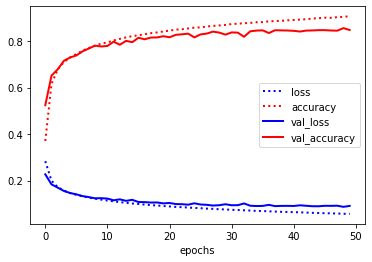

In [0]:
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers

def build_model_1_3():
  model = models.Sequential()
  model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
  model.add(layers.Dense(1024, activation='relu'))
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(10, activation='sigmoid'))

  adam = optimizers.Adam(learning_rate=0.0001)
  model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

  return model

run_evaluation("model_1_3", build_model_1_3, preprocessed_split, base_dir, 
               train=True, epochs=50, batch_size=32)
answer_q_1_3 = """
                As we achieved a good accuracy in the first exercise, I used a 
                similiar architecture for this model. Adding dropout layers did
                not give any improvements. However reducing the learning rate 
                from  0.001 to 0.0001 did give improvements for validation accuracy 
                (0.816 vs 0.856) and therefor creating less overfitting. With the
                lowered learning rate we see the model converging easier.
               """
print("Answer is {} characters long".format(len(answer_q_1_3)))

## Part 2. Convolutional neural networks (10 points)
### Question 2.1: Design a ConvNet (7 points)
- Build a sequential convolutional neural network. Try to achieve the best validation accuracy you can. You should be able to get at least 90% accuracy. You can use any depth, any combination of layers, and any kind of regularization and tuning. 
- Add a description of your design choices in 'answer_q_2_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- You are allowed **800** characters for this answer (but don’t ramble).
- The name of the model should be 'model_2_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data.

Training the model
Epoch 1/50
1986/1986 [==============================] - 13s 7ms/step - loss: 1.1899 - accuracy: 0.6292 - val_loss: 0.4376 - val_accuracy: 0.8643
Epoch 2/50
1986/1986 [==============================] - 13s 7ms/step - loss: 0.5120 - accuracy: 0.8481 - val_loss: 0.3419 - val_accuracy: 0.8978
Epoch 3/50
1986/1986 [==============================] - 13s 7ms/step - loss: 0.4319 - accuracy: 0.8738 - val_loss: 0.4183 - val_accuracy: 0.8724
Epoch 4/50
1986/1986 [==============================] - 13s 7ms/step - loss: 0.3879 - accuracy: 0.8869 - val_loss: 0.2968 - val_accuracy: 0.9094
Epoch 5/50
1986/1986 [==============================] - 13s 7ms/step - loss: 0.3518 - accuracy: 0.8978 - val_loss: 0.2225 - val_accuracy: 0.9332
Epoch 6/50
1986/1986 [==============================] - 13s 7ms/step - loss: 0.3237 - accuracy: 0.9075 - val_loss: 0.2599 - val_accuracy: 0.9206
Epoch 7/50
1986/1986 [==============================] - 13s 7ms/step - loss: 0.2988 - accuracy: 0.9143 - val_lo

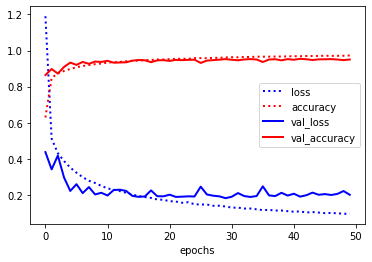

In [0]:
def build_model_2_1():
  model = models.Sequential()
  model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
  model.add(layers.BatchNormalization())

  model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Dropout(0.25))

  model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Dropout(0.25))

  model.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Dropout(0.25))

  model.add(layers.Flatten())

  model.add(layers.Dense(1028, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.5))

  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.5))

  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.5))

  model.add(layers.Dense(10, activation='softmax'))

  adam = optimizers.Adam(learning_rate=0.001)
  model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
                optimizer=adam,
                metrics=['accuracy'])
  
  return model

run_evaluation("model_2_1", build_model_2_1, preprocessed_split, base_dir, 
               train=True, epochs=50, batch_size=32)
answer_q_2_1 = """
               We created a model with 4 convolutional filters. All of them have
               a kernel_size of 3x3 as this seemed to give the optimal amount of 
               information. The last layer has size of 256 and with that can find
               much more detail than without. Then we use a Flattening layer to 
               converge towards a 1d array and almost halve for every next Dense 
               layer, this architecture worked well in the above models with only
               Dense Layers and also works well here. By giving it this pyramid structure
               it first extracts as much information from the image as possible
               and then converges those to our classes.
               """
print("Answer is {} characters long".format(len(answer_q_2_1)))

### Question 2.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not?
- Evaluate the model from question 2.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_2_2'.
- Add a description of your design choices in 'answer_q_2_2': explain what you did and also why. Also discuss the performance of the model.

Training the model
Epoch 1/50
1985/1985 [==============================] - 18s 9ms/step - loss: 1.9177 - accuracy: 0.3649 - val_loss: 0.6766 - val_accuracy: 0.7905
Epoch 2/50
1985/1985 [==============================] - 18s 9ms/step - loss: 0.9183 - accuracy: 0.7135 - val_loss: 0.4297 - val_accuracy: 0.8667
Epoch 3/50
1985/1985 [==============================] - 18s 9ms/step - loss: 0.7059 - accuracy: 0.7862 - val_loss: 0.3697 - val_accuracy: 0.8829
Epoch 4/50
1985/1985 [==============================] - 18s 9ms/step - loss: 0.6150 - accuracy: 0.8152 - val_loss: 0.2928 - val_accuracy: 0.9107
Epoch 5/50
1985/1985 [==============================] - 18s 9ms/step - loss: 0.5670 - accuracy: 0.8299 - val_loss: 0.2785 - val_accuracy: 0.9158
Epoch 6/50
1985/1985 [==============================] - 18s 9ms/step - loss: 0.5226 - accuracy: 0.8444 - val_loss: 0.3200 - val_accuracy: 0.9021
Epoch 7/50
1985/1985 [==============================] - 18s 9ms/step - loss: 0.4970 - accuracy: 0.8533 - val_lo

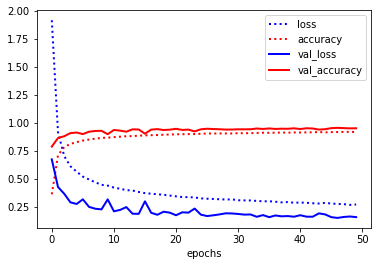

In [0]:
# Note that we build the same untrained model as in question 2.1 but store the 
# trained version as model_2_2. Change attributes as needed to run on augmented
# data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

X_train, X_test, y_train, y_test = preprocessed_split

img_gen = ImageDataGenerator(
    width_shift_range=0.2, 
    height_shift_range=0.2,
    zoom_range=0.2,  
)
img_gen.fit(X_train)
augmented_train_gen = img_gen.flow(X_train, y_train, batch_size=32)
augmented_split = [augmented_train_gen, X_test, y_test]
steps = int(X_train.shape[0] / 32)
run_evaluation("model_2_2", build_model_2_1, augmented_split, base_dir, 
               train=True, epochs=50, batch_size=32, steps_per_epoch=steps, generator=True)

answer_q_2_2 = """
              On this dataset we are quite limited on what kind of augmentations
              we can do since the numbers are already quite well centered. We 
              don't want any flips since all the images already are in the same 
              direction. Scaling also wouldn't help because the images are already 
              tightly cropped around the numbers. A slight shift and slight zoom
              reduces the overfitting, accuracy becomes less but validation 
              accuracy increases.
               """
print("Answer is {} characters long".format(len(answer_q_2_2)))

## Part 3. Model interpretation (10 points)
### Question 3.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_2_2) by evaluating it on the test data. You do not need to retrain the model.
* What is the accuracy of model_2_2 on the test data? Store this in 'test_accuracy_3_1'.
* Plot the confusion matrix in 'plot_confusion_matrix' and discuss which classes are often confused.
* Visualize the misclassifications in more depth by focusing on a single
class (e.g. the number '2') and analyse which kinds of mistakes are made for that class. For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in 'plot_misclassifications'.
* Summarize your findings in 'answer_q_3_1'

In [21]:
from sklearn.metrics import confusion_matrix

model = load_model_from_file(base_dir, 'model_2_2')
_, X_test, _, y_test = preprocessed_split
# evaluation = model.evaluate(X_test, y_test)
# print(evaluation)

test_accuracy_3_1 = 0.9539875388145447

def plot_confusion_matrix():
  model = load_model_from_file(base_dir, 'model_2_2')
  _, X_test, _, y_test = preprocessed_split
  Y_pred = model.predict(X_test)
  cm = confusion_matrix(y_true=np.argmax(y_test, axis=1), y_pred=np.argmax(Y_pred, axis=1))

  fig, ax = plt.subplots()
  im = ax.imshow(cm)
  ax.set_xticks(np.arange(10))
  ax.set_yticks(np.arange(10))
  ax.set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8, 9, 0])
  ax.set_yticklabels([1, 2, 3, 4, 5, 6, 7, 8, 9, 0])
  ax.set_ylabel('True')
  ax.set_xlabel('Predicted')
  for i in range(100):
    ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")

def plot_misclassifications():
  model = load_model_from_file(base_dir, 'model_2_2')
  _, X_test, _, y_test = preprocessed_split
  Y_pred = model.predict(X_test)
  
  misclassified_samples = np.nonzero(np.argmax(y_test, axis=1) != np.argmax(Y_pred, axis=1))[0]


  fig, axes = plt.subplots(1, 10,  figsize=(15, 5))
  count = 0
  pred_raw = 1
  actual_raw = 7

  pred = 9 if pred_raw == 0 else pred_raw - 1
  actual = 9 if actual_raw == 0 else actual_raw - 1

  for nr, i in enumerate(misclassified_samples):
      # pred starts on 0: 9 => 0
      if (np.argmax(Y_pred[i]) == pred  and np.argmax(y_test[i]) == actual):
        axes[count].imshow(X_test[i][:,:,0], cmap="gray")
        axes[count].set_xlabel("Predicted: %s,\n Actual : %s" % (pred_raw, actual_raw))
        axes[count].set_xticks(()), axes[count].set_yticks(())
        count = count + 1

      if (count > 9):
        break

  plt.show();

plot_confusion_matrix()
plot_misclassifications()

answer_q_3_1 = """
               We see that the test data contains much more 1 labels than any other number. If this also represents the training data, the model could be a bit too much converged to predicting 1's. This is also what we see in the confusion matrix: The biggest outlier we see in the confusion matrix is 7 being predicted as 1, which makes sense as they look a lot like each other. Most false predictions lie in the predicted 1 column.
               """
print("Answer is {} characters long".format(len(answer_q_3_1)))

NameError: name 'preprocessed_split' is not defined

### Question 3.2: Visualizing activations (4 points)
* Implement a function `plot_activations()` that returns the most interesting activations (feature maps). Select the first example from the test set. Retrieve and visualize the activations of model 2_2 for that example (make sure you load that model in the function), for every filter for different convolutional layers (at different depths in the network).
* Give an explanation (as detailed as you can) about your observations in 'answer_q_3_2'. Is your model indeed learning something useful?

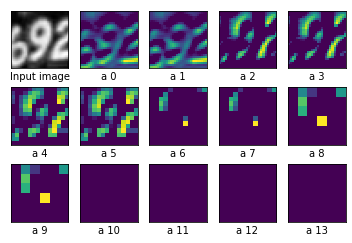

Answer is 410 characters long


In [0]:
from tensorflow.keras import models
import math

def plot_activations():
  img_tensor = X_test[0]
  img_tensor = np.expand_dims(img_tensor, axis=0) 
  
  model = load_model_from_file(base_dir, 'model_2_2')
  layer_outputs = [layer.output for layer in model.layers]
  activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
  
  activations = activation_model.predict(img_tensor)

  fig, axes = plt.subplots(3, 5)
  axes[0, 0].imshow(img_tensor[0][:,:,0], cmap="gray")
  axes[0, 0].set_xlabel('Input image')
  axes[0, 0].set_xticks([])
  axes[0, 0].set_yticks([])

  for i, activation in enumerate(activations[:14]):    
    pos_x = int(math.floor((i + 1) / 5))
    pos_y = (i + 1) % 5

    axes[pos_x, pos_y].matshow(activation[0, :, :, 2], cmap='viridis')
    axes[pos_x, pos_y].set_xlabel('a %s' % (str(i)));
    axes[pos_x, pos_y].set_xticks([])
    axes[pos_x, pos_y].set_yticks([])

  plt.show()

plot_activations()

answer_q_3_2 = """
               We see that the model first focuses on the edges of the numbers
               and then slowly converges to focusing on a point where the eges come
               together. For the 9 this would be in the center, right. Each number
               has a different way of "connecting the dots", so when input size is 
               being reduced this is a good feature to focus on
               """
print("Answer is {} characters long".format(len(answer_q_3_2)))

### Question 3.3: Visualizing activations (4 points)
* Again, select the first example from the test set, and the trained model_2_2.
* Implement a function `plot_activation_map()` that builds and shows a class activation map for your last convolutional layer that highlights what the model is paying attention to when classifying the example.
* If possible, superimpossible the activation map over the image. If not, plot
them side by side. Implement a function 'plot_3_3' that returns the entire plot.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


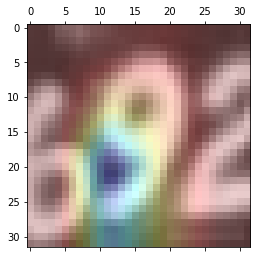

In [0]:
from tensorflow.keras import models
import tensorflow 
import tensorflow.keras.backend as K
import cv2

def plot_3_3():
  SAMPLE = 0
  last_conv_name = 'conv2d_127'
  img_tensor = X_test[SAMPLE]
  img_tensor = np.expand_dims(img_tensor, axis=0) 
  
  model = load_model_from_file(base_dir, 'model_2_2')
  
  with tensorflow.GradientTape() as tape:
    class_weights = model.layers[-1].get_weights()[0]
    last_conv_layer = model.get_layer(last_conv_name)
    iterate = models.Model([model.inputs], [model.output, last_conv_layer.output])
    model_out, last_conv_layer = iterate(img_tensor)
    class_out = model_out[:, np.argmax(model_out[0])]
    grads = tape.gradient(class_out, last_conv_layer)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))

  heatmap = tensorflow.reduce_mean(tensorflow.multiply(pooled_grads, last_conv_layer), axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  heatmap = heatmap.reshape((4, 4))

  INTENSITY = 0.03
  heatmap = cv2.resize(heatmap, (32, 32))
  heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET) * INTENSITY
  img = heatmap * INTENSITY + X_test[SAMPLE]

  plt.matshow(img)
  plt.show()

plot_3_3()

## Part 4. Transfer learning (10 points)
### Question 4.1 Fast feature extraction with VGG16 (5 points)
- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_4_1` that adds a dense layer to the convolutional base, and freezes the convolutional base. Consider unfreezing the last few convolutional layers and evaluate whether that works better.
- Train the resulting model on the *original* (colored) training data
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_1'.

58892288/58889256 [==============================] - 0s 0us/step
Training the model
Epoch 1/5
1986/1986 [==============================] - 25s 13ms/step - loss: 0.3183 - accuracy: 0.8761 - val_loss: 0.3177 - val_accuracy: 0.9000
Epoch 2/5
1986/1986 [==============================] - 25s 12ms/step - loss: 0.3174 - accuracy: 0.9000 - val_loss: 0.3174 - val_accuracy: 0.9000
Epoch 3/5
1986/1986 [==============================] - 25s 12ms/step - loss: 0.3175 - accuracy: 0.8988 - val_loss: 0.3176 - val_accuracy: 0.9000
Epoch 4/5
1986/1986 [==============================] - 25s 12ms/step - loss: 0.3174 - accuracy: 0.8996 - val_loss: 0.3175 - val_accuracy: 0.9000
Epoch 5/5
1986/1986 [==============================] - 25s 13ms/step - loss: 0.3174 - accuracy: 0.9000 - val_loss: 0.3174 - val_accuracy: 0.9000
Saving to file
Model stored in /content/drive/My Drive/assignment-3-luucv
Model: "model_3"
_________________________________________________________________
Layer (type)                 Outpu

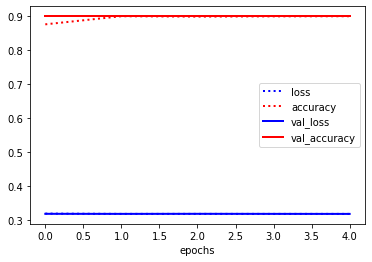

In [0]:
from tensorflow.keras import applications

def build_model_4_1():
  input_tensor = layers.Input(shape=(32, 32, 3))
  base = applications.vgg16.VGG16(include_top=False, input_tensor=input_tensor, weights='imagenet')

  CUT = 16
  for layer in base.layers[:CUT]:
    layer.trainable=False
  for layer in base.layers[CUT:]:
      layer.trainable=True

  output = layers.Dense(10, activation='softmax')(base.output)
  model = models.Model(inputs=base.inputs, outputs=output)
  model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

  return model
  

original_split = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)

run_evaluation("model_4_1", build_model_4_1, original_split, base_dir, 
               train=True, epochs=5, batch_size=32)

answer_q_4_1 = """
               We see that this model converges much quicker as it is already weighted.
               It converges after 1 epoch with minimal gap between the accuracy and
               validation accuray, meaning there is no overfitting. After this 1 
               epoch it also doesn't improve. We variated with the amount of trainable 
               layers, and optimum between speed and accuracy seems to be at around 
               retraining 3 layers. 
               """
print("Answer is {} characters long".format(len(answer_q_4_1)))

### Question 4.2 Embeddings and pipelines (5 points)
- Generate embeddings of the original images by running them through the trained convolutional part of model_4_1 (without the dense layer) and returning the output. Embed the training and test data and store them to disk using the helper functions below. Implement a function `store_embeddings` that loads model_4_1 and stores all necessary embeddings to file. Make sure to run it once so that the embeddings are stored (and submitted).
- Implement a function 'generate_pipeline' that returns an scikit-learn pipeline. You can use any non-deep learning technique (eg. SVMs, RFs,...), and preprocessing technique. You can do model selection using the validation set. 
- Implement a function 'evaluate_pipeline' that evaluates a given pipeline on a given training and test set. 
- Implement a function 'evaluation_4_2' that evaluates your pipeline on the embedded training and test set (loaded from file) and returns the accuracy. 
- Describe what you did and what you observed. Report the obtained accuracy score. Can you beat your best model thus far?

In [0]:
import pickle
import gzip

def store_embedding(X, name):  
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'wb') as file_pi:
    pickle.dump(X, file_pi)

def load_embedding(name):
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'rb') as file_pi:
    return pickle.load(file_pi)

def store_embeddings():
  """ Stores all necessary embeddings to file
  """
  model = load_model_from_file(base_dir, 'model_4_1')

  base = models.Sequential()
  for layer in model.layers[:-1]:
    base.add(layer)

  

  pass

def generate_pipeline():
  """ Returns an sklearn pipeline.
  """
  pass

def evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test):
  """ Evaluates the given pipeline, trained on the given embedded training set and 
      evaluated on the supplied embedded test set. Returns the accuracy score.
  """
  pass

def evaluation_4_2(X_train, y_train, X_test, y_test):
  """ Runs 'evaluate_pipeline' with embedded versions of the input data 
  and returns the accuracy.
  """
  pass

store_embeddings();
answer_q_4_2 = """
               Your answer 
               """
print("Pipeline:",generate_pipeline())
print("Answer is {} characters long".format(len(answer_q_4_2)))

Model: "model_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_35 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0  

/content/drive/My Drive/assignment-3-luucv
Converting: Assignment 3.ipynb
Running notebook... (may take a while)
/usr/local/lib/python3.6/dist-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")
tcmalloc: large alloc 2440167424 bytes == 0x6b3a000 @  0x7fc3fe52c1e7 0x5929fc 0x4ce180 0x567322 0x5a5611 0x4de436 0x4e00e8 0x5ec32e 0x50a9da 0x50c5b9 0x509d48 0x50aa7d 0x50c5b9 0x508245 0x509642 0x595311 0x54a6ff 0x551b81 0x5aa6ec 0x50abb3 0x50d390 0x508245 0x50a080 0x50aa7d 0x50c5b9 0x508245 0x50a080 0x50aa7d 0x50c5b9 0x508245 0x5167b9
tcmalloc: large alloc 2440134656 bytes == 0x9825a000 @  0x7fc3fe52c1e7 0x5929fc 0x5eb636 0x4df2b7 0x5ec32e 0x50a9da 0x50c5b9 0x509d48 0x50aa7d 0x50c5b9 0x508245 0x509642 0x595311 0x54a6ff 0x551b81 0x5aa6ec 0x50abb3 0x50d390 0x508245 0x50a080 0x50aa7d 0x50c5b9 0x508245 0x50a080 0x50aa7d 0x50c5b9 0x508245 0x5167b9 0x567